In [33]:
import scipy as sp
import matplotlib.pyplot as plt

import librosa
import librosa.display as ld
from IPython.display import Audio

import csv
import itertools
from collections import Counter

In [34]:
def maiores_indices(lista, n):
    if n > len(lista):
        raise ValueError("O número de índices solicitados excede o tamanho da lista.")
    
    # Criar uma lista de tuplas (índice, valor)
    lista_com_indices = list(enumerate(lista))
    
    # Ordenar a lista pelo valor, em ordem decrescente
    lista_ordenada = sorted(lista_com_indices, key=lambda x: x[1], reverse=True)
    
    # Retornar os primeiros 'n' índices
    return [indice for indice, valor in lista_ordenada[:n]]

def carregar_frequencias(arquivo_csv):
    notas = []
    frequencias = []
    
    with open(arquivo_csv, newline='', encoding='utf-8-sig') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        notas = next(reader)
        for linha in reader:
            frequencias.append([float(freq) for freq in linha])
    
    return notas, frequencias

notas, frequencias = carregar_frequencias('Tabelas/frequencias.csv')

def carregar_formacoes(arquivo_csv):
    tipos_de_acorde = []
    formacoes = []
    
    with open(arquivo_csv, newline='', encoding='utf-8-sig') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        tipos_de_acorde = next(reader)
        for linha in reader:
            formacoes.append([freq for freq in linha])
    
    return tipos_de_acorde, formacoes

tipos_de_acorde, formacoes = carregar_formacoes("Tabelas/formacoes.csv")

def get_chord(formation):
    global tipos_de_acorde
    global formacoes

    for linha in formacoes:
        for i, notes in enumerate(linha):
            if formation == notes:
                if i == 0:
                    return "Nota: " + linha[0]
                elif i == 1:
                    return linha[0]
                else:
                    return linha[0] + tipos_de_acorde[i]
    
    return None

def nota_mais_proxima(frequencia):
    global notas
    global frequencias
    
    diferenca_minima = float('inf')
    nota_proxima = None
    
    for i, faixa in enumerate(frequencias):
        for j, freq in enumerate(faixa):
            diferenca = abs(frequencia - freq)
            if diferenca < diferenca_minima:
                diferenca_minima = diferenca
                nota_proxima = notas[j]

    return nota_proxima

def get_formation(note_list):
    remove_duplicates = set(note_list)
    formation = "".join(sorted(list(remove_duplicates)))
    return (formation, len(remove_duplicates))

def freqs_to_notes(freq_list):
    notes = []
    for freq in freq_list:
        notes.append(nota_mais_proxima(freq))
    
    return notes

def gerar_combinacoes(lista, n):
    lista = sorted(lista)

    combinacoes = list(itertools.combinations(lista, n))

    formacoes_possiveis = []
    for tupla in combinacoes:
        formacoes_possiveis.append("".join(tupla))
    
    return formacoes_possiveis

In [107]:
data, fs = librosa.load("Acordes/G.wav")

Audio(data=data, rate=fs)

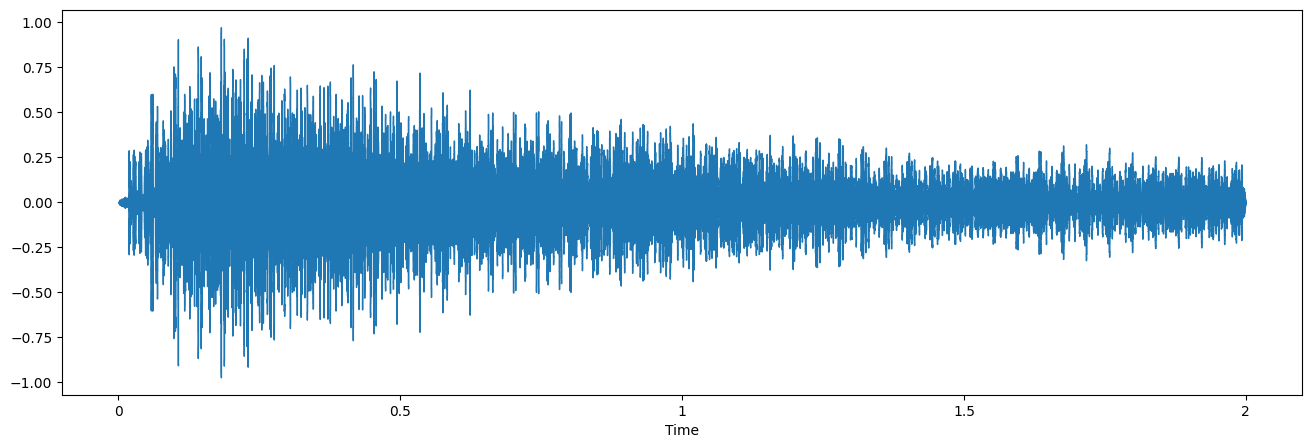

In [108]:
plt.figure(figsize=(16, 5))
ld.waveshow(data, sr=fs)

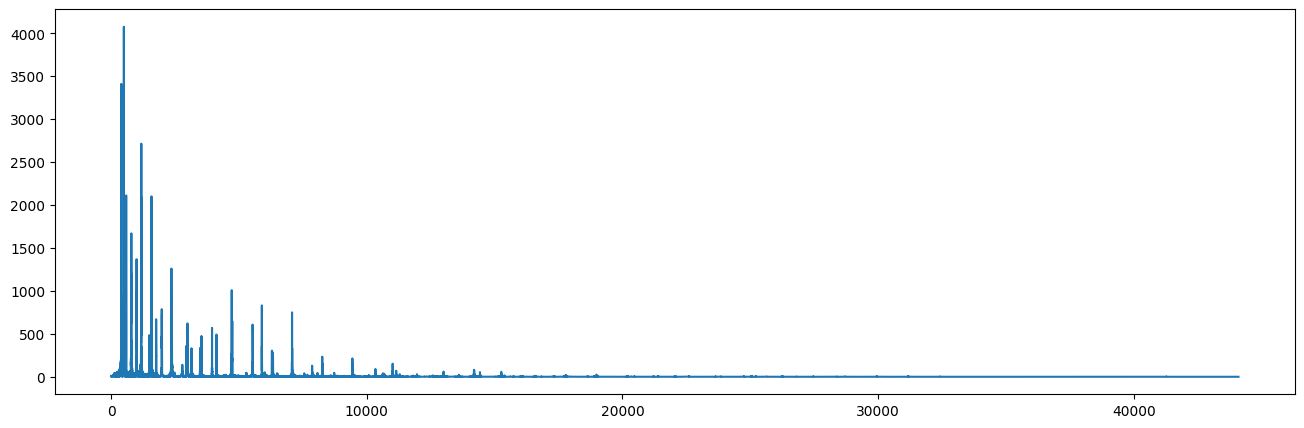

In [109]:
f = sp.fft.dct(data)
f = abs(f)

plt.figure(figsize=(16, 5))
plt.plot(f)

In [110]:
print(lista := maiores_indices(f,12))

lista = freqs_to_notes(lista)

print(lista, end="\n\n")

formation, n_notes = get_formation(lista)

print("Notas do acorde:", formation, end="\n\n")

chord = get_chord(formation)

if chord is not None:
    print(chord)
elif n_notes == 3:
    print("Não foi possível identificar um acorde com essa formação")
elif n_notes == 4:
    formacoes_possiveis = gerar_combinacoes(set(lista), 3)

    for formacao in formacoes_possiveis:
        chord = get_chord(formacao)
        if chord != None:
            print(chord)
            break
elif n_notes > 4:
    formacoes_possiveis = gerar_combinacoes(set(lista), 4) + gerar_combinacoes(set(lista), 3)

    for formacao in formacoes_possiveis:
        chord = get_chord(formacao)
        if chord != None:
            print(chord)
            break
elif n_notes == 2:
    print(get_chord(Counter(lista).most_common(1)[0][0]))

[495, 394, 1178, 586, 1576, 1172, 1574, 393, 392, 788, 1177, 992]
['B', 'G', 'D', 'D', 'G', 'D', 'G', 'G', 'G', 'G', 'D', 'B']

Notas do acorde: BDG

G
